<a href="https://colab.research.google.com/github/iampotential/data_visulaization/blob/master/med_images_1709.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydicom


     |████████████████████████████████| 35.3MB 119kB/s 


In [0]:
import numpy as np
import pydicom
from skimage.transform import resize

import matplotlib.pyplot as plt
from glob import glob
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.ndimage
from skimage import morphology
from skimage import measure
from skimage.transform import resize
from sklearn.cluster import KMeans


####Upload zip file here


In [3]:
from google.colab import files
files.upload()

Saving Original Data sets-20200222T203548Z-001.zip to Original Data sets-20200222T203548Z-001.zip


In [0]:
data = 'Original Data sets-20200222T203548Z-001.zip'
from zipfile import ZipFile
import zipfile
zf = ZipFile(data, 'r')
zf.extractall('/content/dcmimages')
zf.close()


After files have been unzipped, we can then pull in pixel data from images. To do this we use glob to find file paths that have .dcm extentensions. Then we add then to alist along with pateint info from file names. 


In [0]:

med_images = []
patient_number = []
import glob
for filepath in glob.iglob('/content/dcmimages/Original Data sets/*/*/*/*.dcm'):
  patient_number.append(str(filepath).split("sets/")[1])
  med_images.append(pydicom.read_file(filepath))


In [0]:
#Below we do additional cleaning on file names to save patient number as integer to list
group_labels = []
for i in range(0,len(patient_number)):
  group_labels.append(int(str(str(patient_number[i].split("-")[1]).split("/")[0])))


Append all images to a list of np.arrays and then stack them. We then save them into a single file. We do the same for the labels. Additionally, we seperate the 320x320 images from the 384x384 images 

In [0]:
pixels320 = []
labels_320 = []
for img in range(0,len(med_images)):
  if med_images[img].pixel_array.shape == (320,320):
    labels_320.append(group_labels[img])
    pixels320.append(med_images[img].pixel_array)
stack320 = np.stack(pixels320)
labels320 = np.stack(labels_320)
np.save('/content/dcmimages/dcmpixelarrays320',stack320)
np.save('/content/dcmimages/dcmimlabels320',labels320)



pixels384 = []
labels_384 = []
for img in range(0,len(med_images)):
  if med_images[img].pixel_array.shape == (384, 384):
    labels_384.append(group_labels[img])
    pixels384.append(med_images[img].pixel_array)
stack384 = np.stack(pixels384)
labels384 = np.stack(labels_384)
np.save('/content/dcmimages/dcmpixelarrays384',stack384)
np.save('/content/dcmimages/dcmimlabels384',labels384)

Next to make sure we have saved everything correctly, we can display some images with matplotlib

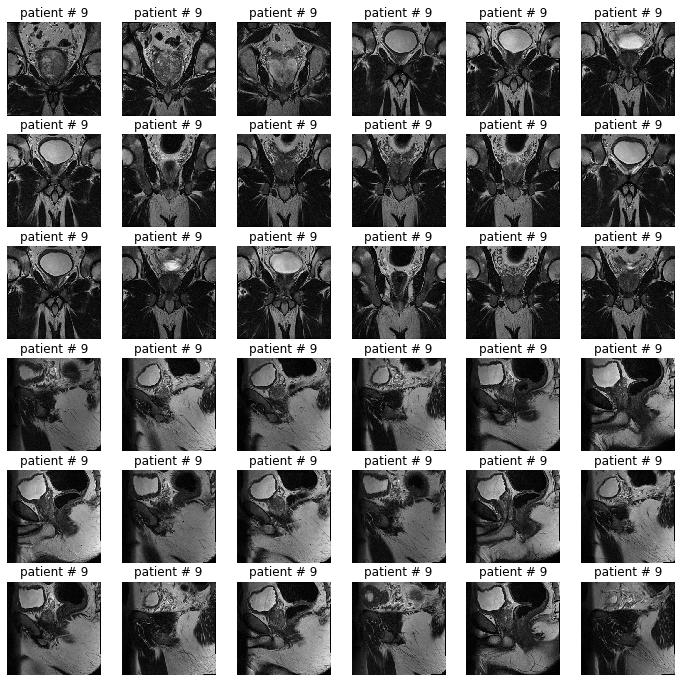

In [13]:
starting = 75
def sample_stack(stack, rows=6, cols=6, start_with=starting, show_every=1):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title("patient # {}".format(labels_320[i]))
        ax[int(i/rows),int(i % rows)].imshow(stack[ind],cmap='gray')
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()
sample_stack(pixels320)


In [0]:
loaded = np.load('/content/dcmimages/savenpa320.npy',mmap_mode='r')

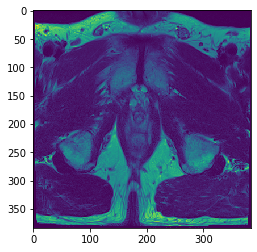

In [0]:
plt.imshow(stack384[111]*22)

In [0]:
from sklearn.neighbors import KDTree, NearestNeighbors
from sklearn.preprocessing import KBinsDiscretizer

In [0]:
flattened_images = []
for img in image_chunk:
  flattened_images.append(img.flatten())

In [0]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(flattened_images)

In [0]:
distances, indices = nbrs.kneighbors(flattened_images)

In [0]:
### with bins 

est = KBinsDiscretizer(n_bins=24, encode='ordinal', strategy='uniform')

In [0]:
Xt = est.transform(flattened_images)

array([16., 15., 11., 12., 13., 13., 15., 15., 13., 13., 11.,  5.,  2.,
        0.,  0.,  0., 15., 14., 11., 13., 13., 12., 11.,  9.,  7.,  8.,
        8.,  5.,  2.,  0.,  0.,  0., 10.,  9.,  7.,  8.,  8.,  8.,  6.,
        5.,  6.,  5.,  4.,  3.,  2.,  0.,  0.,  0.,  7.,  6.,  3.,  3.,
        4.,  3.,  3.,  4.,  3.,  2.,  3.,  3.,  2.,  0.,  0.,  0.,  2.,
        3.,  2.,  3.,  3.,  2.,  2.,  2.,  1.,  1.,  2.,  2.,  2.,  0.,
        0.,  0.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,
        2.,  2.,  0.,  0.,  0.,  1.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,
        1.,  1.,  1.,  2.,  2.,  0.,  0.,  0.,  1.,  2.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  0.,  0.,  0.,  1.,  1.,
        2.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0

In [0]:

!pip install plotly==4.3.0

     |████████████████████████████████| 7.3MB 20.6MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [16]:
import numpy as np
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot



import urllib.request
req = urllib.request.Request('https://raw.githubusercontent.com/iampotential/data_visulaization/master/Segmentation.obj')
try:
    response=urllib.request.urlopen(req)
    obj_data = response.read().decode('utf-8')
except urllib.error.URLError as e:
    print(e.reason)
def obj_data_to_mesh3d(odata):
    # odata is the string read from an obj file
    vertices = []
    faces = []
    lines = odata.splitlines()

    for line in lines:
        slist = line.split()
        if slist:
            if slist[0] == 'v':
                vertex = np.array(slist[1:], dtype=float)
                vertices.append(vertex)
            elif slist[0] == 'f':
                face = []
                for k in range(1, len(slist)):
                    face.append([int(s) for s in slist[k].replace('//','/').split('/')])
                if len(face) > 3: # triangulate the n-polyonal face, n>3
                    faces.extend([[face[0][0]-1, face[k][0]-1, face[k+1][0]-1] for k in range(1, len(face)-1)])
                else:
                    faces.append([face[j][0]-1 for j in range(len(face))])
            else: pass


    return np.array(vertices), np.array(faces)
vertices, faces = obj_data_to_mesh3d(obj_data)


print(vertices.shape)
x, y, z = vertices[:,:3].T
I, J, K = faces.T

mesh = go.Mesh3d(
            x=-x,
            y=-y,
            z=z,
            vertexcolor=vertices[:, 3:], #the color codes must be triplets of floats  in [0,1]!!
            i=I,
            j=J,
            k=K,
            name='',
            opacity=.4,
            showscale=False)

layout = go.Layout(title='Mesh3d from a Wavefront obj file',
                   font=dict(size=14, color='black'),
                   width=900,
                   height=800,
                   scene=dict(xaxis=dict(visible=False),
                              yaxis=dict(visible=False),  
                              zaxis=dict(visible=False), 
                              aspectratio=dict(x=1.5,
                                               y=0.9,
                                               z=0.5
                                         ),
                              camera=dict(eye=dict(x=1., y=1., z=0.5)),
                        ), 
                  paper_bgcolor='rgb(235,235,235)',
                  margin=dict(t=175)) 
fig = go.Figure(data=[mesh], layout=layout)
iplot(fig)


(34752, 3)


In [0]:
def find_urethra(img, display=True):
    row_size= img.shape[0]
    col_size = img.shape[1]
    
    mean = np.mean(img)
    std = np.std(img)
    img = img-mean
    img = img/std
    middle = img[int(col_size/5):int(col_size/5*4),int(row_size/5):int(row_size/5*4)] 
    mean = np.mean(middle)  
    max = np.max(img)
    min = np.min(img)
    img[img==max]=mean
    img[img==min]=mean

    kmeans = KMeans(n_clusters=8).fit(np.reshape(middle,[np.prod(middle.shape),1]))
    centers = sorted(kmeans.cluster_centers_.flatten())
    threshold = np.mean(centers)
    thresh_img = np.where(img<threshold,1.0,0.0)  # threshold the image

    # First erode away the finer elements, then dilate to include some of the pixels surrounding the lung.  
    # We don't want to accidentally clip the lung.

    eroded = morphology.erosion(thresh_img,np.ones([3,3]))
    dilation = morphology.dilation(eroded,np.ones([16,16]))

    labels = measure.label(dilation) # Different labels are displayed in different colors
    label_vals = np.unique(labels)
    regions = measure.regionprops(labels)
    good_labels = []
    for prop in regions:
        B = prop.bbox
        if B[2]-B[0]<row_size/10*9 and B[3]-B[1]<col_size/10*9 and B[0]>row_size/5 and B[2]<col_size/5*4:
            good_labels.append(prop.label)
    mask = np.ndarray([row_size,col_size],dtype=np.int8)
    mask[:] = 0

    for N in good_labels:
        mask = mask + np.where(labels==N,1,0)
    mask = morphology.dilation(mask,np.ones([25,25])) 
    if (display):
        fig, ax = plt.subplots(2, 2, figsize=[12, 12])
        ax[0, 0].set_title("Original")
        ax[0, 0].imshow(img, cmap='gray')
        ax[0, 1].set_title("Threshold")
        ax[0, 1].imshow(thresh_img, cmap='gray')
        ax[1, 0].set_title("After Erosion and Dilation")
        ax[1, 0].imshow(dilation, cmap='gray')
        ax[1, 1].set_title("Color Labels")
        ax[1, 1].imshow(labels)


        
        plt.show()
    return mask*img
find_urethra(data[0])

PlotlyError: ignored

In [0]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.filters import threshold_otsu
from skimage import measure

from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.filters import unsharp_mask

def find_urethera(dcm_image):
  image = unsharp_mask(dcm_image,radius=1, amount=.7)

  # apply threshold
  thresh = threshold_otsu(image)
  bw = closing(image > thresh, square(5))


  label_image = label(bw)
  image_label_overlay = label2rgb(label_image, image=image)

  fig, ax = plt.subplots(figsize=(10, 6))
  ax.imshow(dcm_image)
  contours = measure.find_contours(dcm_image,5,positive_orientation='high',fully_connected='high')
  for n, contour in enumerate(contours):
    ax.plot(contour[0:5, 1], contour[0:5, 0], linewidth=2)
  for region in regionprops(label_image):
      
      if region.area >= 75 and region.area <= 975:
          
          minr, minc, maxr, maxc = region.bbox
          rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                    fill=False, edgecolor='red', linewidth=1)
          ax.add_patch(rect)


  plt.show()

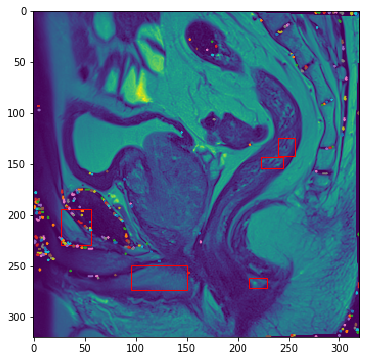

In [88]:
find_urethera(pixels320[2])

array([[ 34.76190476, 319.        ],
       [ 35.        , 318.97191011],
       [ 36.        , 318.97487437],
       [ 37.        , 318.97969543],
       [ 38.        , 318.97474747],
       [ 38.07692308, 319.        ]])